# Getting Started

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('cosc2789-2021/cleaned_train.csv')
validation = pd.read_csv('cosc2789-2021/cleaned_validation.csv')
test = pd.read_csv('cosc2789-2021/cleaned_test.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438700 entries, 0 to 438699
Data columns (total 46 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Severity                 438700 non-null  int64  
 1   Start_Lat                438700 non-null  float64
 2   Start_Lng                438700 non-null  float64
 3   End_Lat                  438700 non-null  float64
 4   End_Lng                  438700 non-null  float64
 5   Distance(mi)             438700 non-null  float64
 6   Side                     438700 non-null  object 
 7   City                     438700 non-null  object 
 8   County                   438700 non-null  object 
 9   State                    438700 non-null  object 
 10  Zipcode                  438700 non-null  object 
 11  Timezone                 438700 non-null  object 
 12  Airport_Code             438700 non-null  object 
 13  Temperature(F)           438700 non-null  float64
 14  Humi

In [3]:
data.head(3)

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Side,City,County,State,...,Astronomical_Twilight,Start_Time_Month,Start_Time_Year,Start_Time_Hour,End_Time_Month,End_Time_Year,End_Time_Hour,Weather_Timestamp_Month,Weather_Timestamp_Year,Weather_Time_Hour
0,2,39.10148,-84.52341,39.09841,-84.52241,0.219,r,cincinnati,hamilton,oh,...,day,2,2016,6,2,2016,12,2,2016,5
1,2,41.06213,-81.53784,41.06217,-81.53547,0.123,r,akron,summit,oh,...,day,2,2016,6,2,2016,12,2,2016,6
2,2,39.06324,-84.03243,39.06731,-84.05851,1.427,r,williamsburg,clermont,oh,...,day,2,2016,8,2,2016,14,2,2016,8


# Missing Values

In [4]:
print("Total missing values:", data.isna().sum().sum())
print("Total missing values:", test.isna().sum().sum())
print("Total missing values:", validation.isna().sum().sum())

Total missing values: 0
Total missing values: 0
Total missing values: 0


# Unnecessary Columns

In [5]:
# select non-numeric columns
categorical = data.select_dtypes(exclude=[np.number])
categorical = categorical.columns.tolist()
print(f'List of non numeric in train dataset is {categorical}\n\n')


# select non-numeric columns
numeric = data.select_dtypes(include=[np.number])
numeric = numeric.columns.tolist()
print(f'List of numeric in test dataset is {numeric}\n\n')

List of non numeric in train dataset is ['Side', 'City', 'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code', 'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


List of numeric in test dataset is ['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Start_Time_Month', 'Start_Time_Year', 'Start_Time_Hour', 'End_Time_Month', 'End_Time_Year', 'End_Time_Hour', 'Weather_Timestamp_Month', 'Weather_Timestamp_Year', 'Weather_Time_Hour']




In [6]:
# unneeded_columns = ['Side', 'City', 'County', 'State', 'Zipcode', 'Airport_Code', 'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump',  
#                     'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Sunrise_Sunset', 
#                     'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

unneeded_columns = ['Side', 'City', 'County', 'State', 'Zipcode', 'Airport_Code', 'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump',  
                    'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Sunrise_Sunset', 
                    'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 
                    'Start_Lat', 'End_Lat', 'End_Lng', 'Temperature(F)', 'Visibility(mi)', 'Precipitation(in)', 
                    'Start_Time_Month', 'Start_Time_Year', 'Start_Time_Hour', 'End_Time_Month', 'End_Time_Year', 'End_Time_Hour', 'Weather_Timestamp_Month', 'Weather_Time_Hour']

data = data.drop(unneeded_columns, axis=1)
test = test.drop(unneeded_columns, axis=1)
validation = validation.drop(unneeded_columns, axis=1)

# Encoding

In [7]:
data = data.replace([True, False], [1,0])
test = test.replace([True, False], [1,0])
validation = validation.replace([True, False], [1,0])


def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

"""
List of non numeric in train dataset is ['Timezone', 'Crossing', 'Traffic_Signal']


List of numeric in test dataset is ['Severity', 'Weather_Timestamp_Year', 'Start_Lng', 'Distance(mi)', 'Humidity(%)', 'Pressure_bc', 'Wind_Speed_bc']
"""

data = onehot_encode(
    data,
    columns=['Timezone', 'Crossing', 'Traffic_Signal'],
    prefixes=['Timezone', 'Crossing', 'Traffic_Signal']
)

test = onehot_encode(
    test,
    columns=['Timezone', 'Crossing', 'Traffic_Signal'],
    prefixes=['Timezone', 'Crossing', 'Traffic_Signal']
)

validation = onehot_encode(
    validation,
    columns=['Timezone', 'Crossing', 'Traffic_Signal'],
    prefixes=['Timezone', 'Crossing', 'Traffic_Signal']
)

In [8]:
data.head(3)

,Severity,Start_Lng,Distance(mi),Humidity(%),Pressure(in),Wind_Speed(mph),Weather_Timestamp_Year,Timezone_us/central,Timezone_us/eastern,Timezone_us/mountain,Timezone_us/pacific,Crossing_0,Crossing_1,Traffic_Signal_0,Traffic_Signal_1
0,2,-84.52341,0.219,97,29.70,7.0,2016,0,1,0,0,1,0,1,0
1,2,-81.53784,0.123,55,29.65,7.0,2016,0,1,0,0,1,0,1,0
2,2,-84.03243,1.427,100,29.66,8.1,2016,0,1,0,0,1,0,0,1


### WRITING DATA BACK TO FILES
After completing your analysis and adding new columns, I write the results back to a file and get that data to visualize on Dash App. Otherwise, the data will be lost when the Jupyter Lab shuts down.

In [9]:
# # To write the data from the data frame into a file, use the to_csv function.
# data.to_csv('cosc2789-2021/encoded_train.csv', index=False)
# test.to_csv('cosc2789-2021/encoded_test.csv', index=False)
# validation.to_csv('cosc2789-2021/encoded_validation.csv', index=False)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151607 entries, 0 to 151606
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      151607 non-null  object 
 1   Start_Lng               151607 non-null  float64
 2   Distance(mi)            151607 non-null  float64
 3   Humidity(%)             151607 non-null  int64  
 4   Pressure(in)            151607 non-null  float64
 5   Wind_Speed(mph)         151607 non-null  float64
 6   Weather_Timestamp_Year  151607 non-null  int64  
 7   Timezone_US/Central     151607 non-null  uint8  
 8   Timezone_US/Eastern     151607 non-null  uint8  
 9   Timezone_US/Mountain    151607 non-null  uint8  
 10  Timezone_US/Pacific     151607 non-null  uint8  
 11  Crossing_0              151607 non-null  uint8  
 12  Crossing_1              151607 non-null  uint8  
 13  Traffic_Signal_0        151607 non-null  uint8  
 14  Traffic_Signal_1    

# Splitting/Scaling

# 📈 Training a Linear Regression Model

> Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

## X and y arrays

## 🧱 Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [11]:
X = data.drop(['Severity'], axis = 1)
y = data['Severity']

X_train = X
y_train = y

accident_ID = test.ID.to_list()
TEST = test.drop(['ID'], axis = 1)

X_test = validation.drop(['Severity'], axis = 1)
y_test = validation['Severity']

# 📦 Preparing Data For Multiple Linear Regression
> Linear regression is been studied at great length, and there is a lot of literature on how your data must be structured to make best use of the model.

> As such, there is a lot of sophistication when talking about these requirements and expectations which can be intimidating. In practice, you can uses these rules more as rules of thumb when using Ordinary Least Squares Regression, the most common implementation of linear regression.

> Try different preparations of your data using these heuristics and see what works best for your problem.
- **Linear Assumption.** Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).
- **Remove Noise.** Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.
- **Remove Collinearity.** Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.
- **Gaussian Distributions.** Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.
- **Rescale Inputs:** Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

In [12]:
# %%time
#
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
#
# pipeline = Pipeline([
#     ('std_scalar', StandardScaler())
# ])
#
# X_train = pipeline.fit_transform(X_train)
# X_test = pipeline.transform(X_test)
# TEST = pipeline.fit_transform(TEST)

In [30]:
from sklearn import metrics

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [13]:
X_train.sample(5)

,Start_Lng,Distance(mi),Humidity(%),Pressure(in),Wind_Speed(mph),Weather_Timestamp_Year,Timezone_us/central,Timezone_us/eastern,Timezone_us/mountain,Timezone_us/pacific,Crossing_0,Crossing_1,Traffic_Signal_0,Traffic_Signal_1
313401,-82.184810,0.704,72,30.00,15.0,2020,0,1,0,0,1,0,1,0
50769,-74.211920,0.433,96,29.79,19.6,2017,0,1,0,0,1,0,1,0
150501,-118.532910,0.537,60,29.14,3.0,2019,0,0,0,1,1,0,1,0
427800,-81.550000,1.147,45,30.17,10.0,2020,0,1,0,0,1,0,1,0
35223,-76.807324,0.717,83,29.99,4.6,2016,0,1,0,0,1,0,1,0


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train

array([[ 0.76827295, -0.22526654,  1.40891255, ..., -0.24477601,
         0.35342509, -0.35342509],
       [ 0.92985185, -0.28414359, -0.42104135, ..., -0.24477601,
         0.35342509, -0.35342509],
       [ 0.79484477,  0.515603  ,  1.53962355, ..., -0.24477601,
        -2.82945393,  2.82945393],
       ...,
       [ 1.06806695, -0.17252251,  1.53962355, ..., -0.24477601,
         0.35342509, -0.35342509],
       [-1.22058291, -0.34976696,  0.27608394, ..., -0.24477601,
        -2.82945393,  2.82945393],
       [-1.06426496, -0.21913351,  0.97320924, ..., -0.24477601,
         0.35342509, -0.35342509]])

In [17]:
from sklearn.neural_network import MLPRegressor

In [18]:
mlp_reg = MLPRegressor(activation = 'relu',
                       hidden_layer_sizes= (1, ),
                       solver='lbfgs',
                       verbose=True,
                       max_iter=100)

In [19]:
# mlp_reg = MLPRegressor(activation = 'relu',
#                        hidden_layer_sizes= (5, ),
#                        solver='lbfgs',
#                        verbose=True,
#                        max_iter=100)

In [20]:
# mlp_reg = MLPRegressor(activation = 'relu',
#                        hidden_layer_sizes= (2, 4),
#                        solver='lbfgs',
#                        verbose=True,
#                        max_iter=100)

In [21]:
# mlp_reg = MLPRegressor(activation = 'logistic',
#                        hidden_layer_sizes= (2, 4),
#                        solver='lbfgs',
#                        verbose=True,
#                        max_iter=100)

In [22]:
# mlp_reg = MLPRegressor(activation = 'relu',
#                        hidden_layer_sizes= (2, 6, 4),
#                        solver='lbfgs',
#                        verbose=True,
#                        max_iter=1000)

In [23]:
mlp_reg.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(1,), max_iter=100, solver='lbfgs',
             verbose=True)

In [24]:
y_pred = mlp_reg.predict(X_test)

In [25]:
from sklearn.metrics import r2_score

In [26]:
mlp_reg.score(X_train, y_train)

0.10698423993444861

In [27]:
r2_score(y_test, y_pred)

0.106397267465137

In [32]:
results_df = pd.DataFrame(data=[["Artificial Neural Network", *evaluate(y_test, y_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Artificial Neural Network,0.382679,0.332447,0.576582,0.106397,0


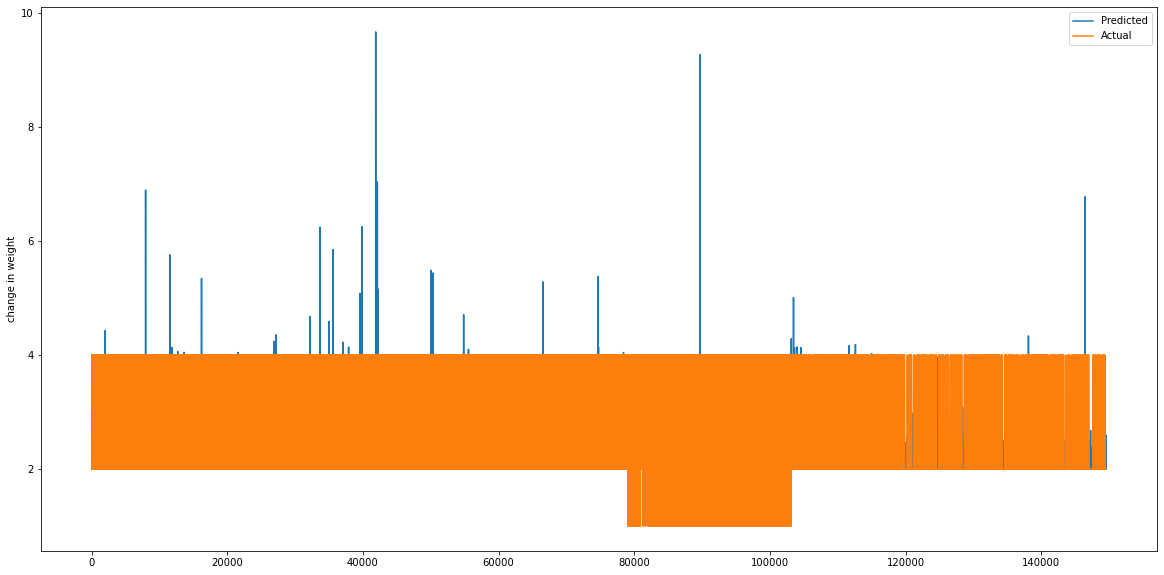

In [28]:
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('change in weight')

plt.legend()
plt.show()

In [29]:
%%time

y_predict_mlp_reg = mlp_reg.predict(TEST)

output = pd.DataFrame({"ID": accident_ID, "Severity": y_predict_mlp_reg})

output.to_csv('submission_mlp_reg.csv', index=False)
print("Submission was successfully saved!")

C:\Users\Thu\anaconda3\envs\as2\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


Submission was successfully saved!
Wall time: 581 ms
